In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Vistaso al dataset

In [64]:
#Cargargar el dataframe
FILE = '../data/raw/weatherAUS.csv'
df = pd.read_csv(FILE)

In [65]:
#Ver la cantiad de columnas y registros
print(df.shape)
df.head()

(145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [66]:
# Veamos las variables categóricas y las numéricas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Limpieza de los datos

In [67]:
#Ver columnas 
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [68]:
#Ver datos nulos
nans=df.isna().sum().sort_values(ascending=False)
pct=nans*100/df.shape[0]
uniques=df.nunique()
noted=pd.concat([nans,pct,uniques,df.dtypes],axis=1)
noted.columns=['Coneo Nulos','Porcentaje Nulos','Valores Unicos','data_type']
noted


,Coneo Nulos,Porcentaje Nulos,Valores Unicos,data_type
Sunshine,69835,48.009762,145,float64
Evaporation,62790,43.166506,358,float64
Cloud3pm,59358,40.807095,10,float64
Cloud9am,55888,38.421559,10,float64
Pressure9am,15065,10.356799,546,float64
Pressure3pm,15028,10.331363,549,float64
WindDir9am,10566,7.263853,16,object
WindGustDir,10326,7.098859,16,object
WindGustSpeed,10263,7.055548,67,float64
Humidity3pm,4507,3.098446,101,float64


In [69]:
#Contar los duplicados
df.duplicated().sum()

0

Manejo de valores nulos y outliers

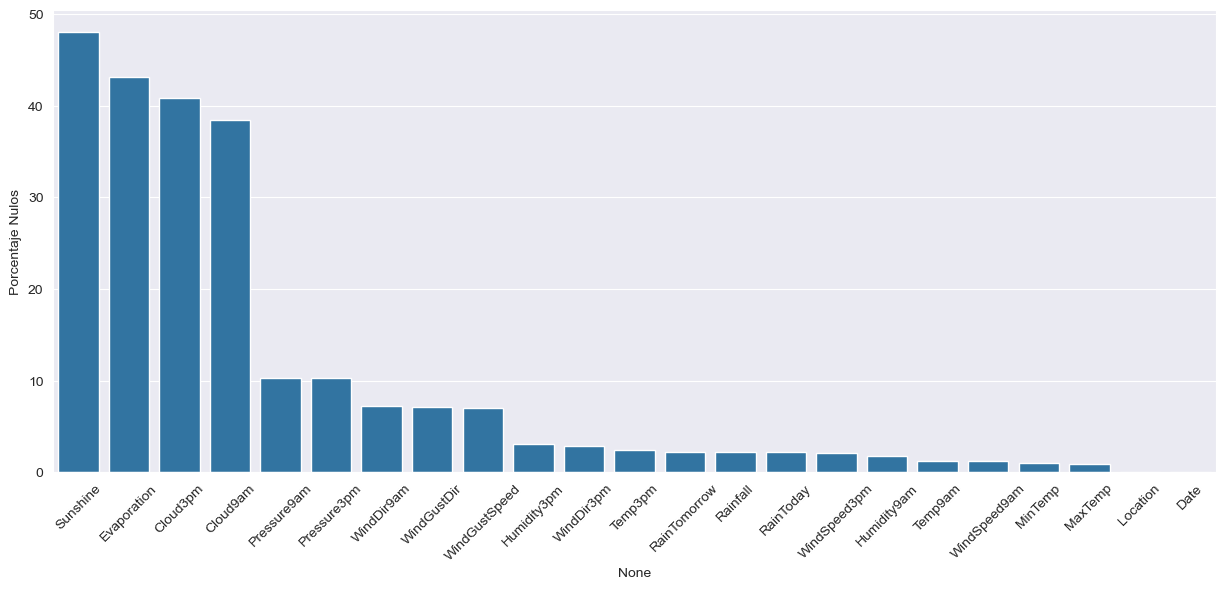

In [70]:
plt.figure(figsize=(15,6))
sns.barplot(x=noted.index,y=noted['Porcentaje Nulos'])
plt.xticks(rotation=45)
plt.show()

In [71]:
def impute_missing(df):
    """Funcion para imputar los valores faltantes de una columna"""
    
    loc_unique = df['Location'].unique()
    num_col = df.select_dtypes(exclude='object').columns
    cat_col = df.select_dtypes(include='object').columns

    for col in num_col:
        for loc in loc_unique:
            filt = df['Location'].isin([loc])
            med = df[filt][col].median()
            df.loc[filt, col] = df[filt][col].fillna(med)
    
    for col in cat_col:
        for loc in loc_unique:
            filt = df['Location'].isin([loc])
            if df[filt][col].empty:
                continue  #Saltar a a siguiente locacion si es esta vacia
            mode = df[filt][col].mode()
            if not mode.empty:
                med = mode[0]
                df.loc[filt, col] = df[filt][col].fillna(med)
    return df

In [72]:
#Imputar faltantes
df=impute_missing(df)

In [73]:
#Verificar si quedan datos nulos
nulos_remanentes=df.isnull().sum().sort_values(ascending=False)

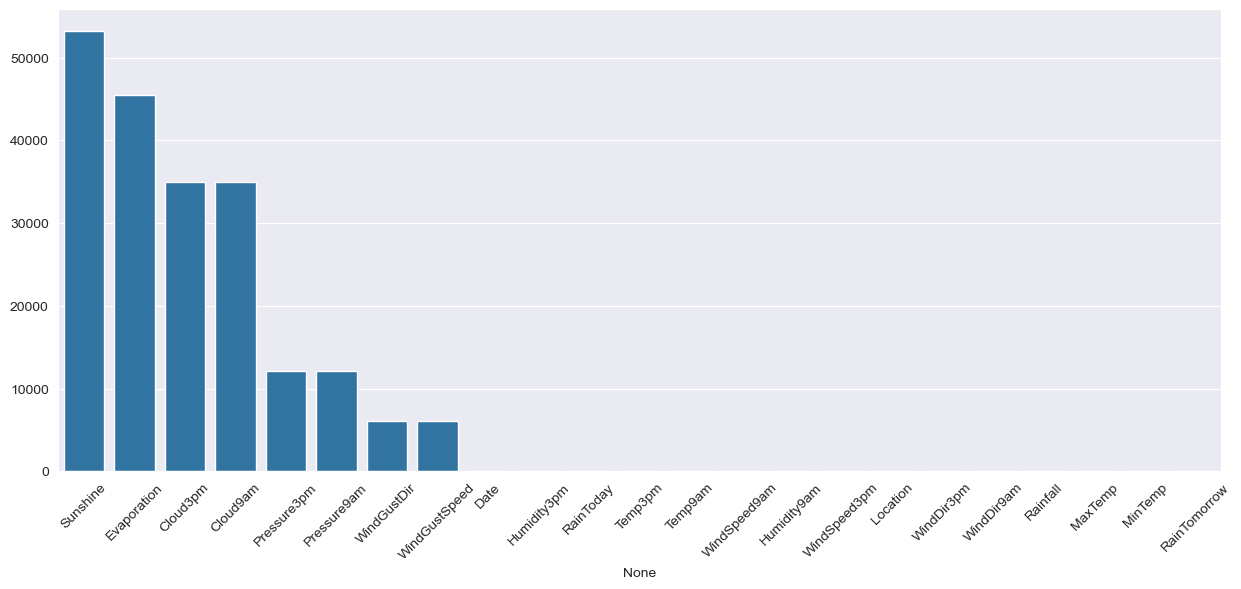

In [74]:
#Verificar la nueva distribucion de nulos
plt.figure(figsize=(15,6))
sns.barplot(x=nulos_remanentes.index,y=nulos_remanentes.values)
plt.xticks(rotation=45)
plt.show()

In [75]:
#Eliminar columas irrelenvantes
print(f'Tamaño del set antes de eliminar columnas irrelevantes: {df.shape}')
df = df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','Date'],axis=1)
print(f'Tamaño del set despues de eliminar datos faltantes: {df.shape}')

Tamaño del set antes de eliminar columnas irrelevantes: (145460, 23)
Tamaño del set despues de eliminar datos faltantes: (145460, 17)


In [76]:
#Eliminar datos nulos
print(f'Tamaño del set antes de eliminar nulos: {df.shape}')
df.dropna(inplace=True)
print(f'Tamaño del set despues de eliminar nulos: {df.shape}')

Tamaño del set antes de eliminar nulos: (145460, 17)
Tamaño del set despues de eliminar nulos: (130301, 17)


In [77]:
#Remover outliers usando Z-score
from scipy import stats
z = np.abs(stats.zscore(df._get_numeric_data()))
print(z)
df= df[(z < 3).all(axis=1)]
print(df.shape)

         MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0       0.157794  0.081228  0.201211       0.294497      0.646589   
1       0.785234  0.233954  0.271977       0.294497      1.174337   
2       0.079208  0.319912  0.271977       0.444665      0.532781   
3       0.502325  0.649421  0.271977       1.207176      0.377682   
4       0.802196  1.265458  0.154034       0.069246      0.832914   
...          ...       ...       ...            ...           ...   
145455  1.508221  0.009596  0.271977       0.681590      0.150066   
145456  1.382484  0.262607  0.271977       1.357343      0.150066   
145457  1.099576  0.491830  0.271977       0.231088      0.605298   
145458  0.722365  0.506156  0.271977       0.906841      0.150066   
145459  0.393550  1.093541  0.271977       0.069246      0.305165   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0           0.574133     0.132786     1.415351     1.414191     1.168545   
1           0.34254

In [78]:
#Codificar etiquetas 
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

/var/folders/65/n47hyjfx3vv_mf4lf63jr1yc0000gn/T/ipykernel_21695/383483955.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
/var/folders/65/n47hyjfx3vv_mf4lf63jr1yc0000gn/T/ipykernel_21695/383483955.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasti

In [79]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


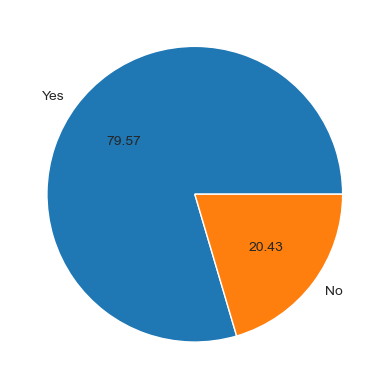

In [80]:
plt.pie(df['RainTomorrow'].value_counts(), labels=['Yes','No'],autopct="%0.2f")
plt.show()

In [81]:
#Codificar variables categoricas
columnas_categoricas = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in columnas_categoricas:
    print(np.unique(df[col]))
df = pd.get_dummies(df, columns=columnas_categoricas)
df.head()

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,False,False,False,False,False,False,False,True,False,False
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,True,False,False,False,False,False,False,False,False,False
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,False,False,False,False,False,False,False,True,False,False
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,False,False,False,True,False,False,False,False,False,False
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,False,False,False,False,False,False,False,False,False,False


In [82]:
#Normalizar la informacion
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,0.526316,0.485646,0.021739,0.513514,0.512821,0.545455,0.670455,0.212121,0.263658,0.305288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.368421,0.538278,0.000000,0.513514,0.102564,0.500000,0.363636,0.242424,0.332542,0.322115,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.513158,0.552632,0.000000,0.540541,0.487179,0.590909,0.295455,0.292929,0.261283,0.343750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.415789,0.607656,0.000000,0.243243,0.282051,0.204545,0.375000,0.151515,0.498812,0.442308,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.634211,0.710526,0.036232,0.472973,0.179487,0.454545,0.795455,0.323232,0.337292,0.278846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
#Se guarda la informacion proocesada
OUTPUT = '../data/processed/weather_data.csv'
df.to_csv(OUTPUT, index=False)